In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

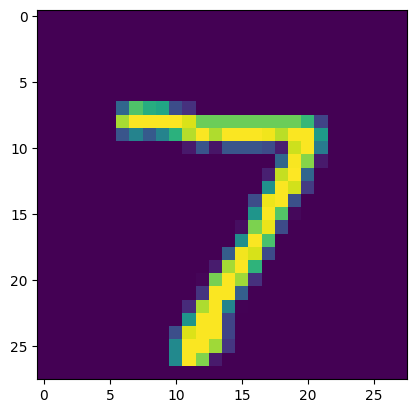

In [10]:
plt.imshow(X_test[0])

In [11]:
X_train = X_train.reshape(X_train.shape[0],28*28)
X_test = X_test.reshape(X_test.shape[0],28*28)
X_train.shape

(60000, 784)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Model

In [22]:
input_layer = Input(shape = (X_train.shape[1],))
bottleneck_layer = Dense(32, activation = 'relu')(input_layer)
output_layer = Dense(X_train.shape[1], activation = 'sigmoid')(bottleneck_layer)

In [23]:
autoencoder = Model(inputs = input_layer, outputs = output_layer)
autoencoder.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
encoder = Model(inputs = input_layer, outputs = bottleneck_layer)
encoder.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
encoded_layer = Input(shape = (32,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs = encoded_layer, outputs = decoder_layer(encoded_layer))
decoder.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,872 (101.06 KB)

 Trainable params: 25,872 (101.06 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
autoencoder.compile(optimizer = 'adam', loss = 'mse')
history = autoencoder.fit(X_train, X_train, epochs = 20, batch_size = 128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0861
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0282
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0194
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0154
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0131
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0119
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0112
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0109
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0106
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0105
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0104
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0103
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0103
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0102
Epoch 15/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

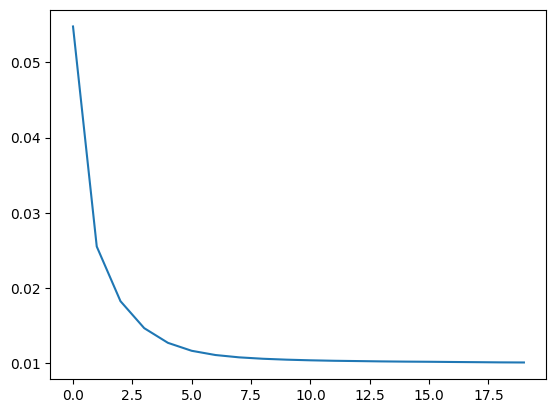

In [27]:
plt.plot(history.history['loss'])

In [28]:
encoded_data = encoder.predict(X_test, batch_size=512)
encoded_data.shape

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


(10000, 32)

In [29]:
output_data = decoder.predict(encoded_data)
output_data.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 784)

In [30]:
output_data = output_data.reshape(output_data.shape[0],28,28)
output_data.shape

(10000, 28, 28)

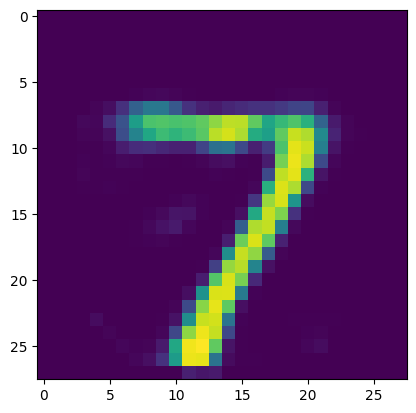

In [31]:
plt.imshow(output_data[0])

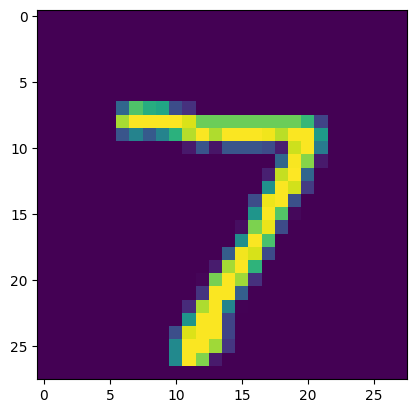

In [33]:
plt.imshow(X_test[0].reshape(28,28))